**Name: Sanjeev Nagadadinni**

**Mat No: 400391884**

**1. Problem Definition,**
1. How do external factors like fuel price, CPI and Unemployment affect store performance.
2. How do department sales vary across different storetype and sizes.
3. How do sales pattern change before , during and after holiday promotions.

In [ ]:
# Import necessary libraries
# For data manipulation and analysis
import pandas as pd
# For numerical operations
import numpy as np
# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Random Forest model for regression tasks
from sklearn.ensemble import RandomForestRegressor
# Metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**2.Data Collection & Preprocessing**

In [ ]:
# Loading the datasets
train_data = pd.read_csv('train.csv')
features_data = pd.read_csv('features.csv')
stores_data = pd.read_csv('stores.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
# Fill missing values in features_data
numerical_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
for column in numerical_columns:
    if column in ['CPI', 'Unemployment']:
        features_data[column].fillna(features_data[column].median())
    else:
        features_data[column].fillna(0)

In [ ]:
# converting to numerical values (1 for 'A', 2 for 'B', 3 for 'C')
stores_data['Type'] = stores_data['Type'].map({'A': 1, 'B': 2, 'C': 3})

In [ ]:
# converting date column formate to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])
features_data['Date'] = pd.to_datetime(features_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])


In [ ]:
# Merging the datasets for easy readable
Walmart_data = train_data.merge(features_data, on=['Store', 'Date', 'IsHoliday'], how='left')
Walmart_data = Walmart_data.merge(stores_data, on=['Store'], how='left')


In [ ]:
# Display of first 5 rows
Walmart_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,1,151315.0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,1,151315.0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,1,151315.0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,1,151315.0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,1,151315.0


In [ ]:
Walmart_data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
421565,45,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,2,118221.0
421566,45,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,2,118221.0
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,2,118221.0
421568,45,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,2,118221.0
421569,45,98,2012-10-26,1076.80,0,58.85,3.882,192.308899,8.667,2,118221.0


In [ ]:
# Information to the whole dataset
Walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  int64         
 10  Size          421570 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 35.4 MB


In [ ]:
# Convert to integers, converting boolean into integers
Walmart_data['IsHoliday'] = Walmart_data['IsHoliday'].astype(int)
Walmart_data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,1,151315.0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,1,151315.0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,1,151315.0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,1,151315.0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,1,151315.0


In [ ]:
# Display null (missing) values in the dataset
Walmart_data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [ ]:
Walmart_data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [ ]:
# Dropping of MarkDown columns
Walmart_data = Walmart_data.drop('MarkDown1', axis=1)
Walmart_data = Walmart_data.drop('MarkDown2', axis=1)
Walmart_data = Walmart_data.drop('MarkDown3', axis=1)
Walmart_data = Walmart_data.drop('MarkDown4', axis=1)
Walmart_data = Walmart_data.drop('MarkDown5', axis=1)

**3. EDA**

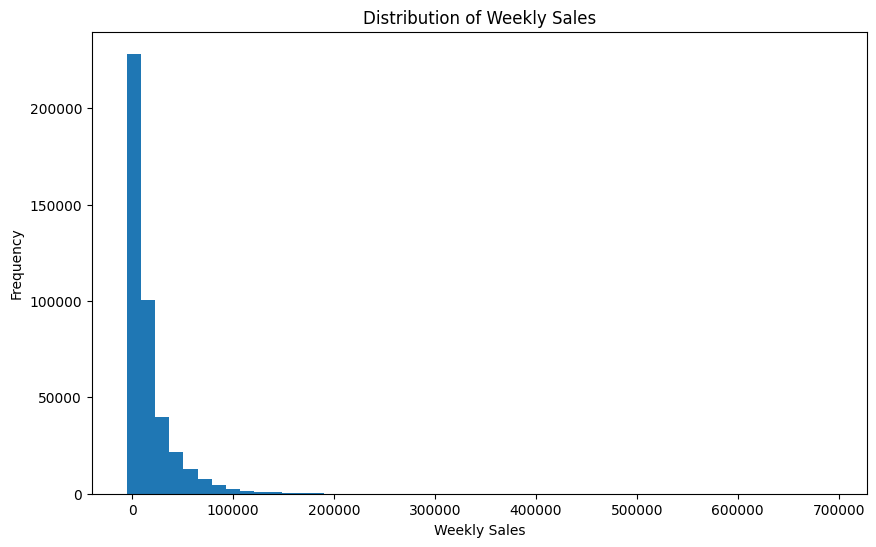

In [ ]:
# Visualize the distribution of the 'Weekly_Sales' column in  DataFrame using a histogram.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
Walmart_data['Weekly_Sales'].plot(kind='hist', bins=50, title='Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

Insights
1. A large number of weekly sales are clustered around the lower range (close to zero). This indicates that the majority of weekly sales fall within a smaller range.

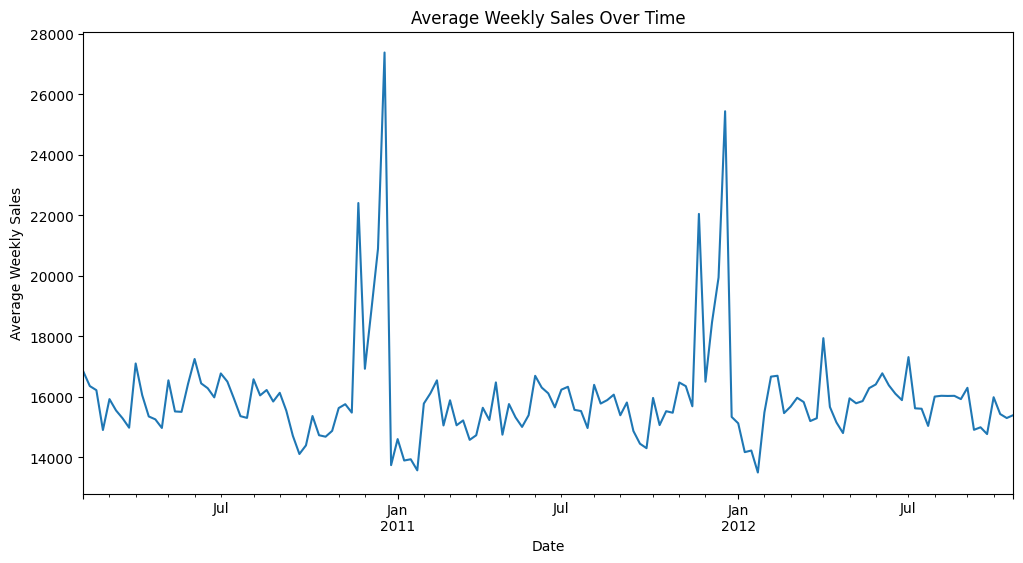

In [ ]:
#  Visualize the trend of average weekly sales over time:
weekly_sales_over_time = Walmart_data.groupby('Date')['Weekly_Sales'].mean()
plt.figure(figsize=(12, 6))
weekly_sales_over_time.plot(title='Average Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.show()

Insights
1. There are clear spikes in average weekly sales around holiday seasons (e.g., Christmas ). These peaks likely correspond to increased shopping activity during major holidays.
2. (Pre, during, Post) christmas - Following the holiday sales spikes, there are noticeable declines in sales, which then stabilize in the weeks after.

<Figure size 1000x600 with 0 Axes>

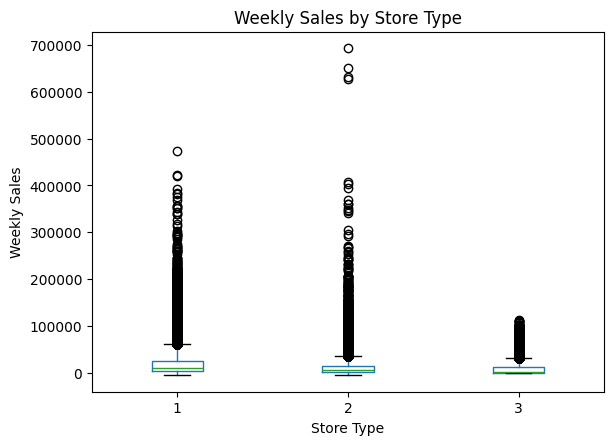

In [ ]:
# Create a boxplot to compare the distribution of 'Weekly_Sales' across different store types
plt.figure(figsize=(10, 6))
Walmart_data.boxplot(column='Weekly_Sales', by='Type', grid=False)
plt.title('Weekly Sales by Store Type')
plt.suptitle('')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

Insights
1. The interquartile range (IQR, represented by the box height) is widest for store type 1, indicating greater variability in its weekly sales.
2. Store 3 Could represent smaller or more specialized stores with lower but more stable sales.
3. Store 2 Falls between types 1 and 3 in both sales levels and variability, possibly indicating mid-size or mid-performing stores.

In [ ]:
# Define a function to treat outliers in the specified column using the (IQR) method:
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
numerical_columns = ['Weekly_Sales',
                     'CPI', 'Unemployment', 'Temperature', 'Fuel_Price', 'Size']
for column in numerical_columns:
    treat_outliers(Walmart_data, column)

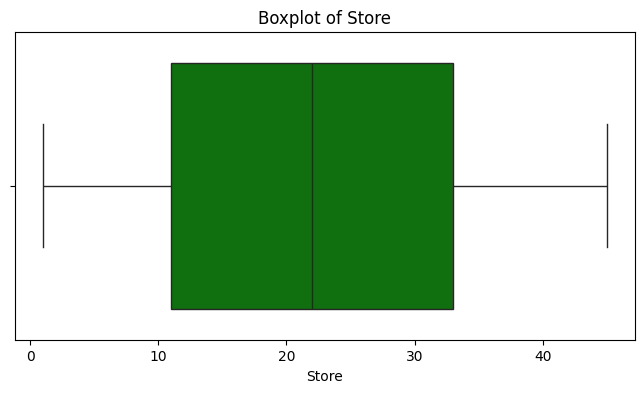

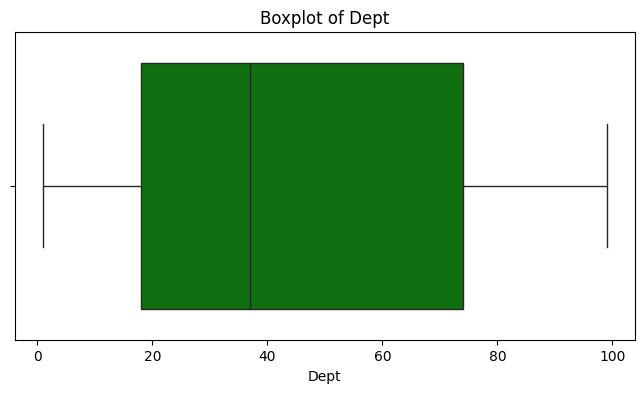

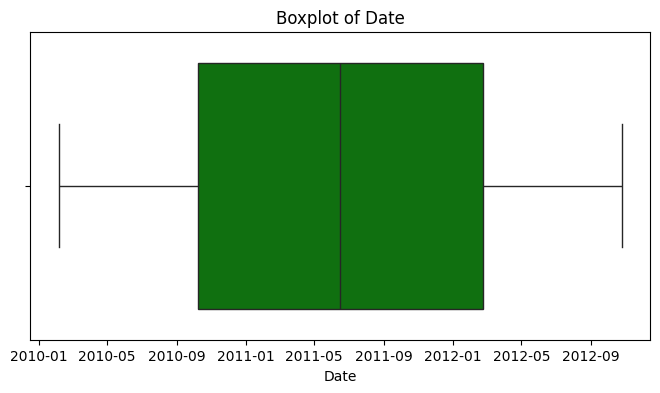

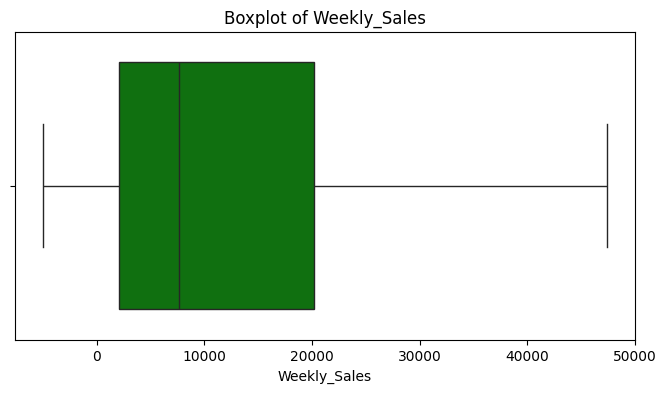

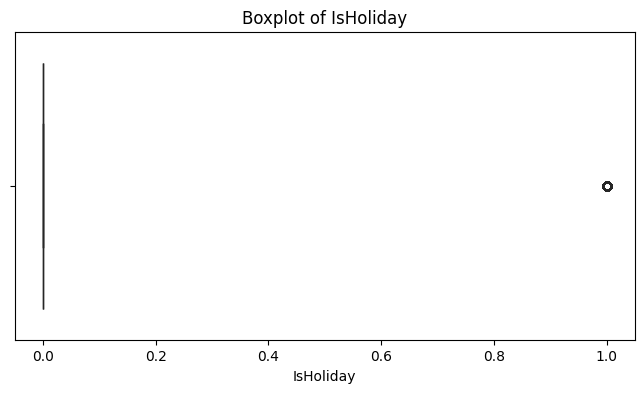

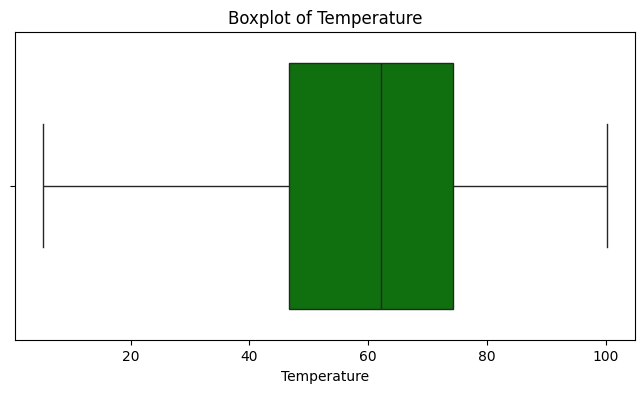

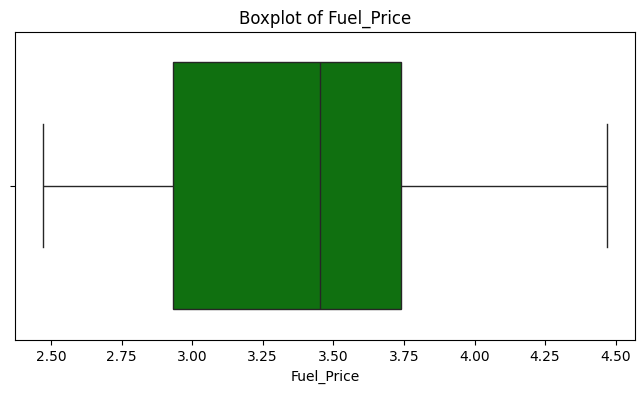

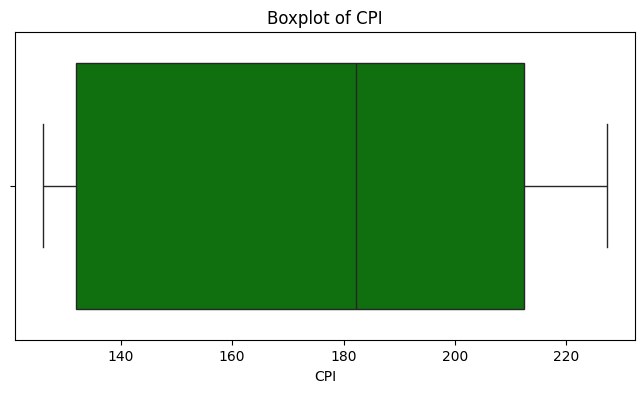

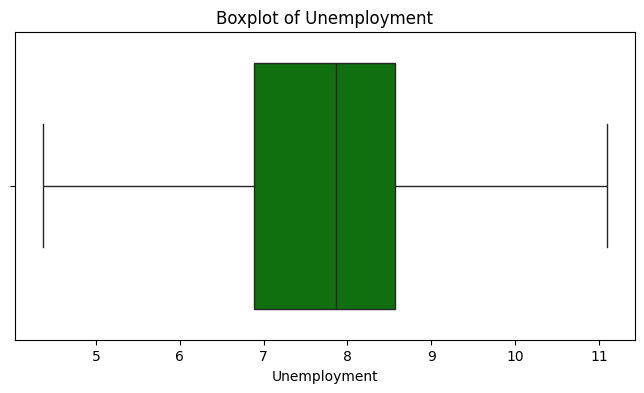

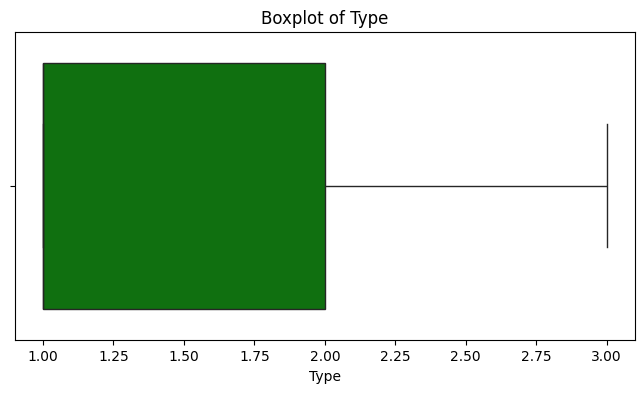

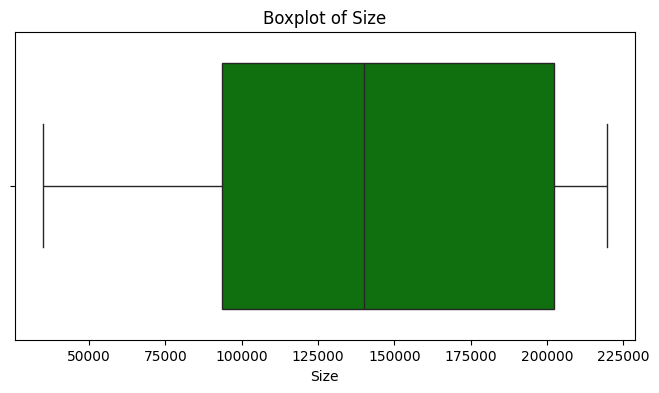

In [ ]:
# Creating boxplot for the features
for feature in Walmart_data:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=Walmart_data, x=Walmart_data[feature], color='green')
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()

In [ ]:
# Checking for missing or null values.
Walmart_data.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Type,0


Distribution of weekly sales

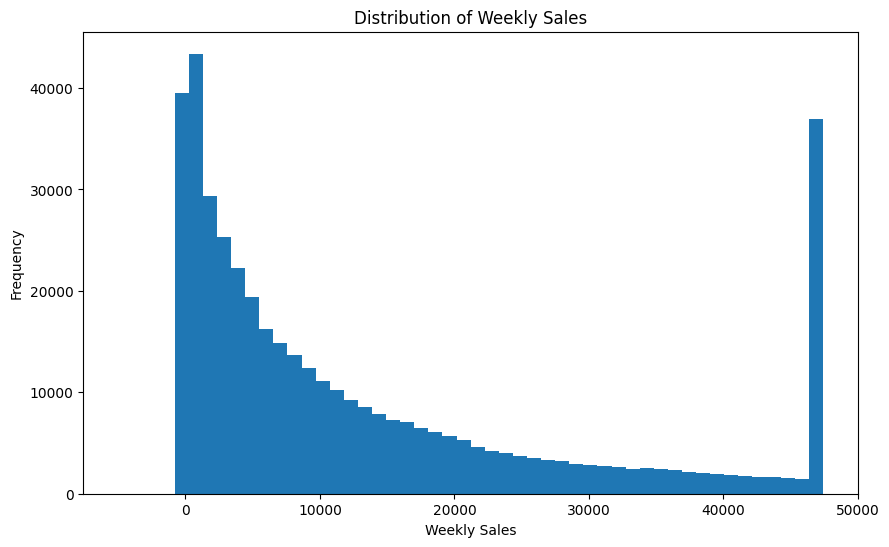

In [ ]:
# Distribution graph for weekly sales
plt.figure(figsize=(10, 6))
Walmart_data['Weekly_Sales'].plot(kind='hist', bins=50, title='Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

**Insights**
1. The data shows a clear right skew, where the majority of weekly sales are concentrated in the lower range, with the frequency sharply decreasing as sales increase.
2. The large proportion of low weekly sales may indicate many small or underperforming stores, requiring strategies to boost sales.

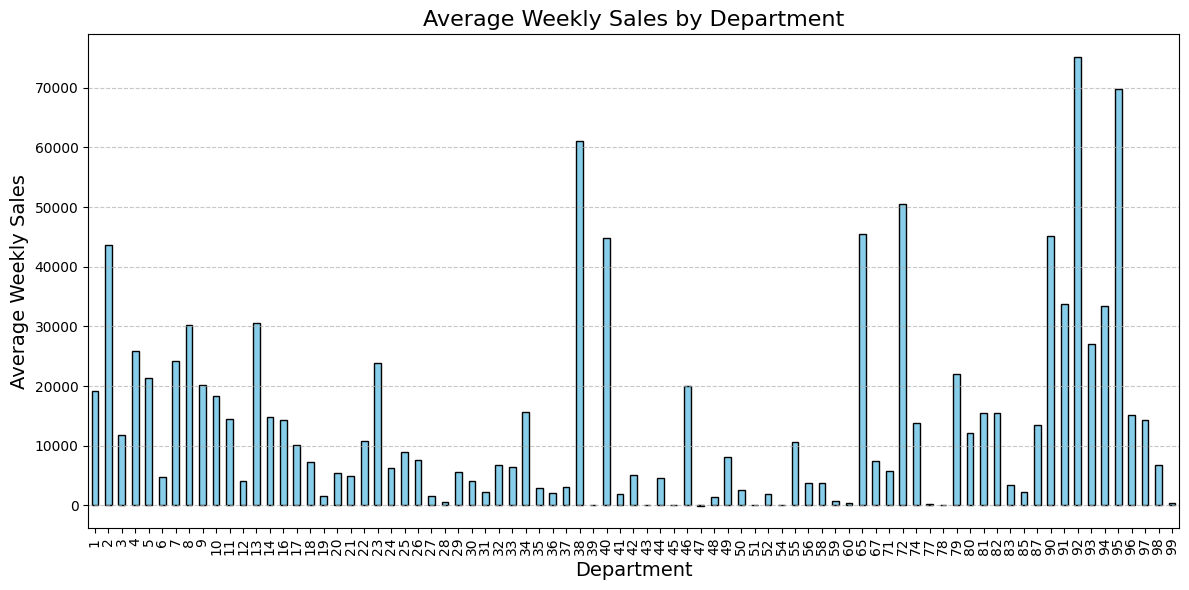

In [ ]:
# Load the dataset
train_data = pd.read_csv('train.csv')

# Calculate the average weekly sales for each department
dept_avg_sales = train_data.groupby('Dept')['Weekly_Sales'].mean()

# Plot the average weekly sales for each department
plt.figure(figsize=(12, 6))
dept_avg_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Weekly Sales by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Average Weekly Sales', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insights**
1. Top-Performing Departments:
Specific departments, such as 95, 38, and 92, have significantly higher average weekly sales compared to others, indicating these are the most revenue-generating departments.
2. Wide Variation Across Departments:
There is a noticeable variation in sales performance across departments, with some departments showing very low sales while others peak substantially.
3. Department Clusters:
Departments such as 2, 38, 72, and 90 also contribute to relatively high sales, forming another tier of well-performing departments.

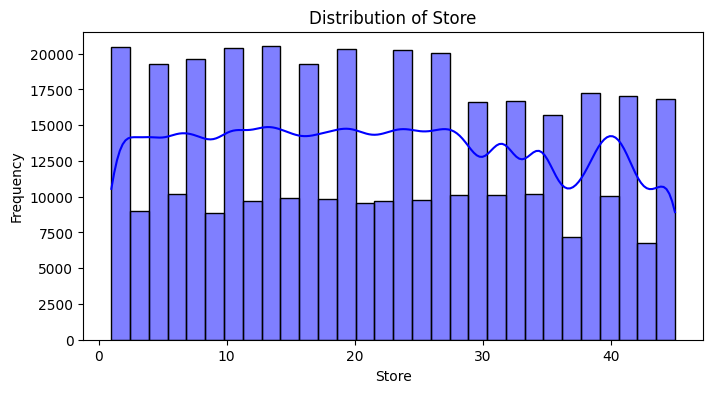

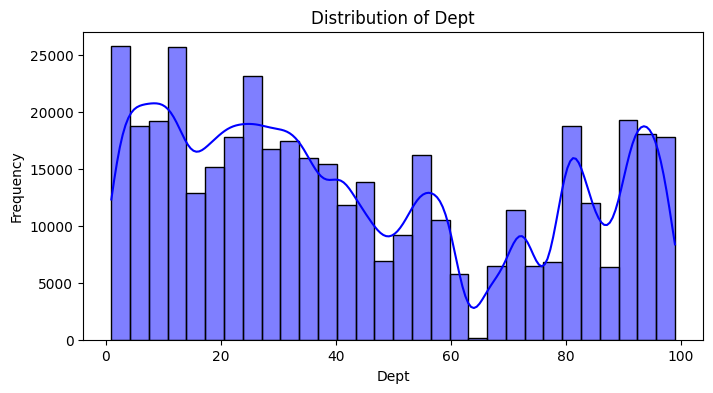

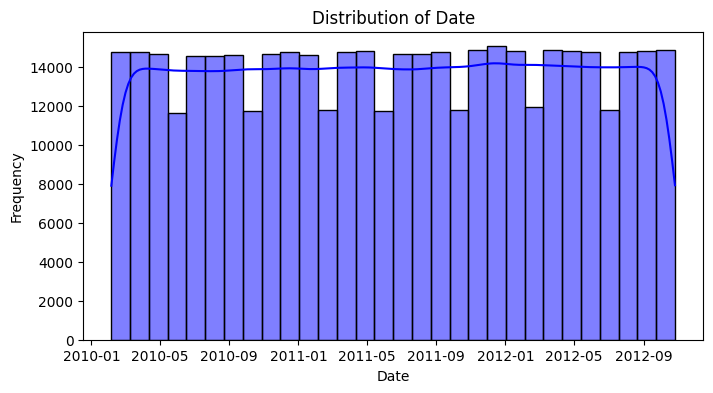

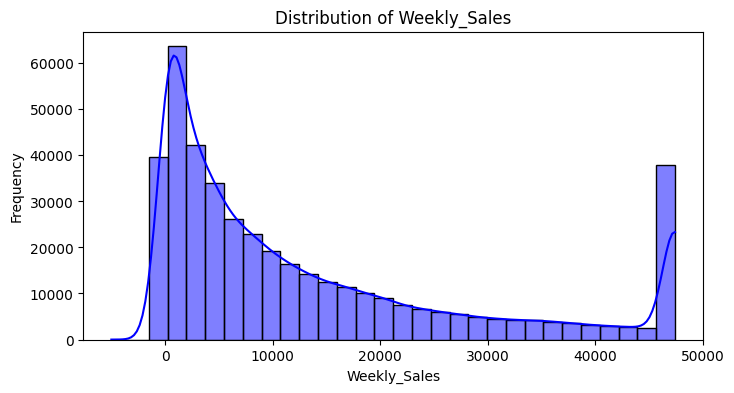

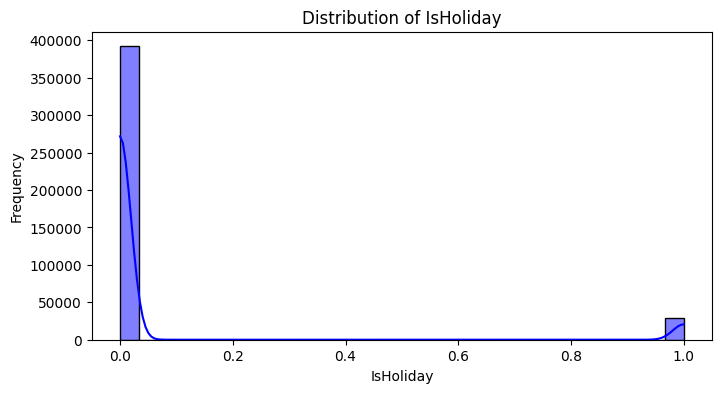

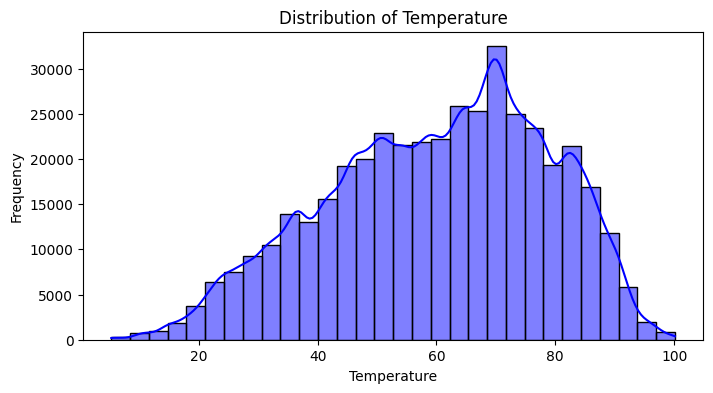

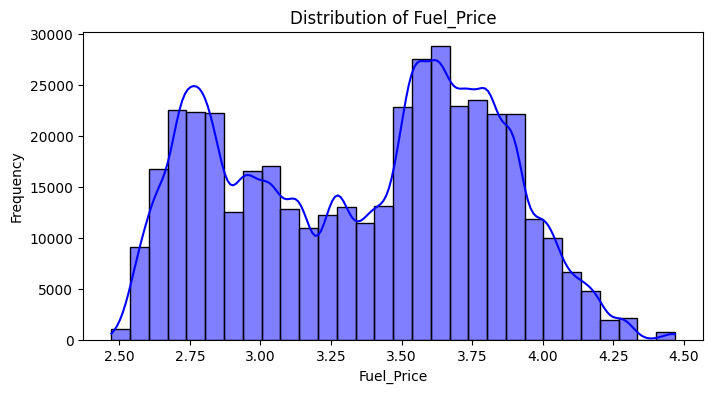

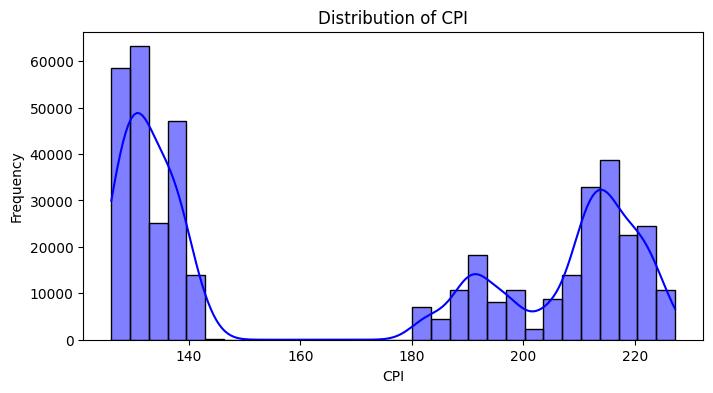

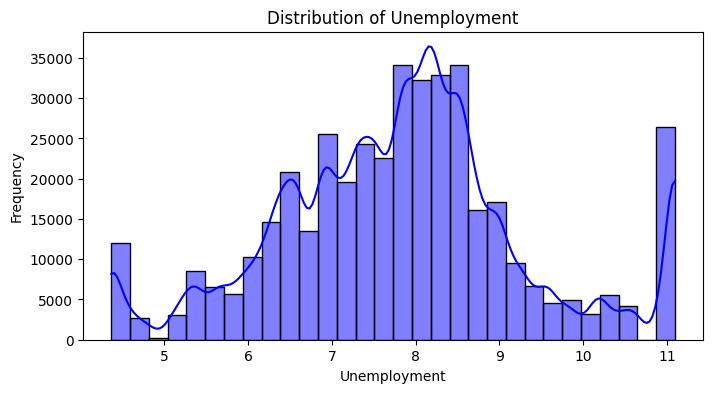

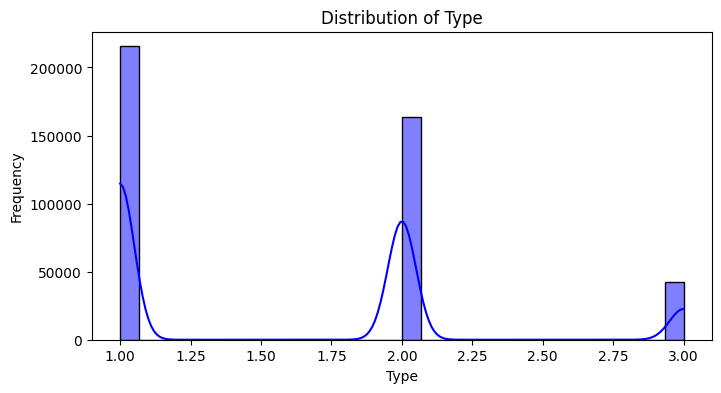

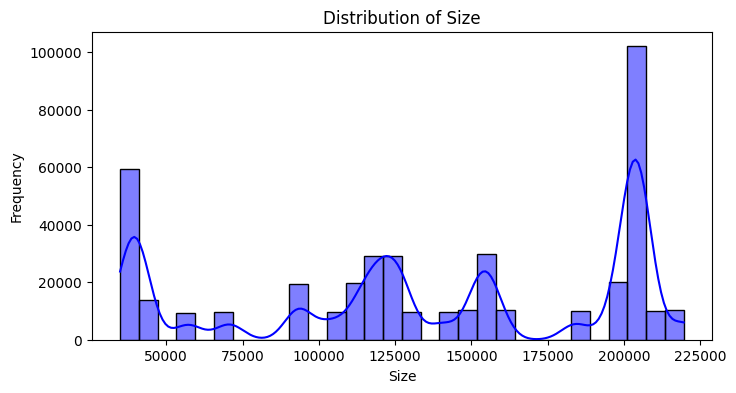

In [ ]:
#  Plot histograms for all features in the Walmart_data
for feature in Walmart_data:
    plt.figure(figsize=(8, 4))
    sns.histplot(Walmart_data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

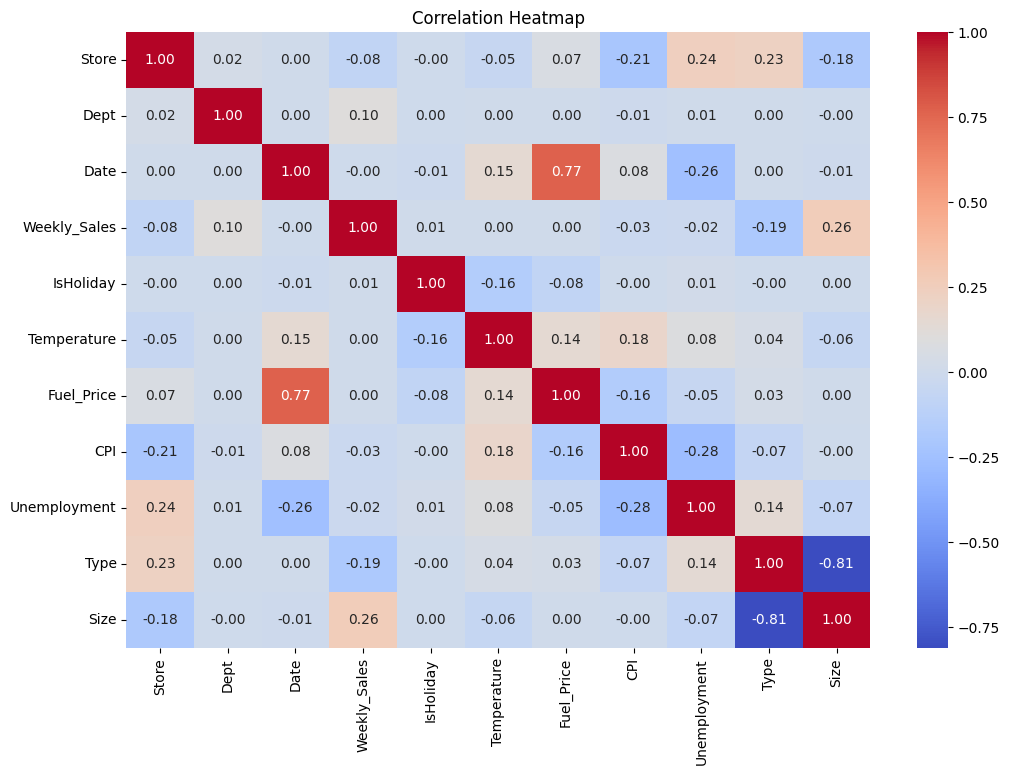

In [ ]:
# PLotting the correlation map for the selected feature
plt.figure(figsize=(12, 8))
correlation_matrix = Walmart_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Insights**
1. CPI - Shows a low correlation with Weekly_Sales, indicating it has a limited direct impact on store performance.

2. Similarly, Unemployment has a weak negative correlation with Weekly_Sales, suggesting that while it might influence spending behavior, it doesn't strongly affect store sales directly.



3.  Fuel price has a negligible correlation with Weekly_Sales, meaning fluctuations in fuel prices are not significant drivers of store performance.
4. External factors might still indirectly affect sales in combination with other variables or under specific conditions, such as economic downturns or fuel price surges.




In [ ]:
# Prepare data for modeling
X = Walmart_data.drop(columns=['Weekly_Sales','Date'])
y = Walmart_data['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5. Model Selection**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

**6. Model Evaluation**

In [ ]:
# Evaluate the model's performance using common regression metrics:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R²: {r2}')

MSE: 6930840.979960124, MAE: 1257.9230072437556, R²: 0.9687326120778722


In [ ]:
# Display the first row of the Walmart_data
Walmart_data.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.5,0,42.31,2.572,211.096358,8.106,1,151315.0


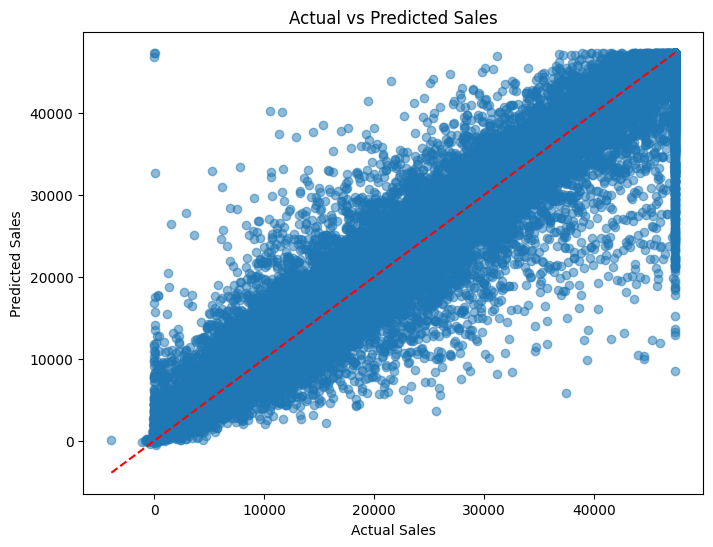

In [ ]:
# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

From the above analysis, the graph is "Weak Positive Correlation"

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
RandomForestRegressor = rf_model

# Defininig new data with correct column names from X_train
weekly_sales=pd.DataFrame([{
    'Store': 1,
    'Dept': 1,
    'IsHoliday': 0,
    'Temperature': 42.31,
    'Fuel_Price': 2.52,
    'CPI':211.096358,
    'Unemployment': 0.00,
    'Type': 1,
    'Size':151315.0,
}])

# Make predictions
new_prediction = rf_model.predict(weekly_sales)
print(f'Predicted Weekly Sales: {new_prediction[0]}')




Predicted Weekly Sales: 29619.955975


In [ ]:
# Save the random forest model to a file named 'Sales Forecasting' using joblib.
import joblib
joblib.dump(rf_model, 'Sales Forecasting')

['Sales Forecasting']

**Furthermore**

To proceed with further deployment in steamlit, I am unable to upload my model in github due to large file size
(2.55GB). In the meanwhile I will relearn and enhance my skills how to make data contrast. At last I will try to deploy and the process will replicated in my final paper submission.

**Challenges Faced**
1. Understanding the data and evaluating it to proceed to build ML model.
2. Selecting ML model for my dataset.
3. Underdstanding the boxplot.

**To be Discussed:**
1. By using big data, how can i deploy the ML model.